In [1]:
import numpy as np
import optuna as opt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score

In [2]:
df_train = pd.read_csv("classification_data/classification_train.csv")
df_test = pd.read_csv("classification_data/classification_test.csv")

In [3]:
df_train

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1
...,...,...,...
665,0.690181,-0.800060,1
666,1.043712,-0.212964,1
667,1.821542,-0.406377,1
668,0.031938,1.424103,0


In [4]:
df_test

,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1
...,...,...,...
325,0.201339,-0.256856,1
326,-0.877304,0.161447,0
327,0.297281,0.760907,0
328,0.032457,0.297988,0


In [5]:
df_train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [6]:
df_test.describe()

,x1,x2,target
count,330.000000,330.000000,330.000000
mean,0.472470,0.266104,0.487879
std,0.986760,0.583819,0.500612
min,-1.693028,-1.031435,0.000000
25%,-0.264152,-0.190844,0.000000
50%,0.503077,0.240346,0.000000
75%,1.218472,0.680558,1.000000
max,2.528373,1.783693,1.000000


In [7]:
df_train.isna().sum()

x1        0
x2        0
target    0
dtype: int64

In [8]:
df_test.isna().sum()

x1        0
x2        0
target    0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

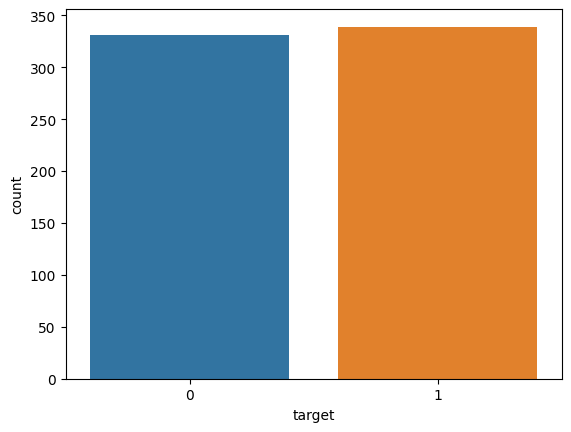

In [9]:
sns.countplot(df_train, x="target")

In [10]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [11]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 60),
    }
    
    clf = RandomForestClassifier(random_state=42, **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return precision_score(y_test, y_pred)

In [12]:
study = opt.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

trial = study.best_trial

[I 2023-07-04 19:37:46,350] A new study created in memory with name: no-name-8a600502-8315-4e57-b1e7-1ae932fa0315
[I 2023-07-04 19:37:49,853] Trial 5 finished with value: 0.8 and parameters: {'n_estimators': 70, 'max_depth': 8, 'min_samples_split': 93, 'min_samples_leaf': 24}. Best is trial 5 with value: 0.8.
[I 2023-07-04 19:37:51,858] Trial 1 finished with value: 0.7906976744186046 and parameters: {'n_estimators': 164, 'max_depth': 35, 'min_samples_split': 45, 'min_samples_leaf': 55}. Best is trial 5 with value: 0.8.
[I 2023-07-04 19:37:52,515] Trial 6 finished with value: 0.8011049723756906 and parameters: {'n_estimators': 193, 'max_depth': 33, 'min_samples_split': 117, 'min_samples_leaf': 12}. Best is trial 6 with value: 0.8011049723756906.
[I 2023-07-04 19:37:54,160] Trial 9 finished with value: 0.8011695906432749 and parameters: {'n_estimators': 263, 'max_depth': 22, 'min_samples_split': 94, 'min_samples_leaf': 48}. Best is trial 9 with value: 0.8011695906432749.
[I 2023-07-04 19

[I 2023-07-04 19:38:29,258] Trial 31 finished with value: 0.8711656441717791 and parameters: {'n_estimators': 875, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:38:29,709] Trial 40 finished with value: 0.8650306748466258 and parameters: {'n_estimators': 426, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:38:31,666] Trial 42 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 368, 'max_depth': 14, 'min_samples_split': 65, 'min_samples_leaf': 11}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:38:32,036] Trial 30 finished with value: 0.8765432098765432 and parameters: {'n_estimators': 956, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:38:32,887] Trial 34 finished with value: 0.8650306748466258 and p

[I 2023-07-04 19:39:11,698] Trial 68 finished with value: 0.8674698795180723 and parameters: {'n_estimators': 828, 'max_depth': 27, 'min_samples_split': 24, 'min_samples_leaf': 8}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:39:12,188] Trial 77 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 479, 'max_depth': 28, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:39:14,157] Trial 69 finished with value: 0.8674698795180723 and parameters: {'n_estimators': 824, 'max_depth': 11, 'min_samples_split': 25, 'min_samples_leaf': 9}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:39:17,816] Trial 70 finished with value: 0.8674698795180723 and parameters: {'n_estimators': 965, 'max_depth': 31, 'min_samples_split': 27, 'min_samples_leaf': 9}. Best is trial 29 with value: 0.8765432098765432.
[I 2023-07-04 19:39:19,183] Trial 71 finished with value: 0.8666666666666667 and

In [13]:
clf = RandomForestClassifier(random_state=42, **study.best_params)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=791, random_state=42)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       169
           1       0.88      0.88      0.88       161

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



In [17]:
for importance_tuple in zip(clf.feature_importances_, X_train.columns):
    importance, column = importance_tuple
    print(f"A Feature {column} tem: {importance:.2f}% de importancia para a target")

A Feature x1 tem: 0.42% de importancia para a target
A Feature x2 tem: 0.58% de importancia para a target
